    Price  Year  Property_Type  Bedrooms  Bathrooms    Location  Size_sqft
0  250000  2023       Detached         3          2      London       1200
1  320000  2022  Semi-Detached         4          3  Manchester       1400
2  180000  2023           Flat         2          1       Leeds        700
3  275000  2021       Terraced         3          2  Birmingham       1100
4  400000  2023       Detached         5          3      Oxford       1800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          10 non-null     int64 
 1   Year           10 non-null     int64 
 2   Property_Type  10 non-null     object
 3   Bedrooms       10 non-null     int64 
 4   Bathrooms      10 non-null     int64 
 5   Location       10 non-null     object
 6   Size_sqft      10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 692.0+ bytes
None
  

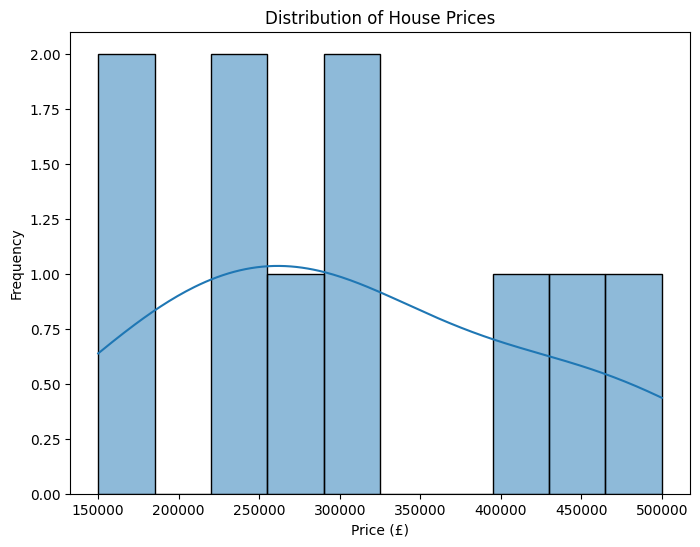

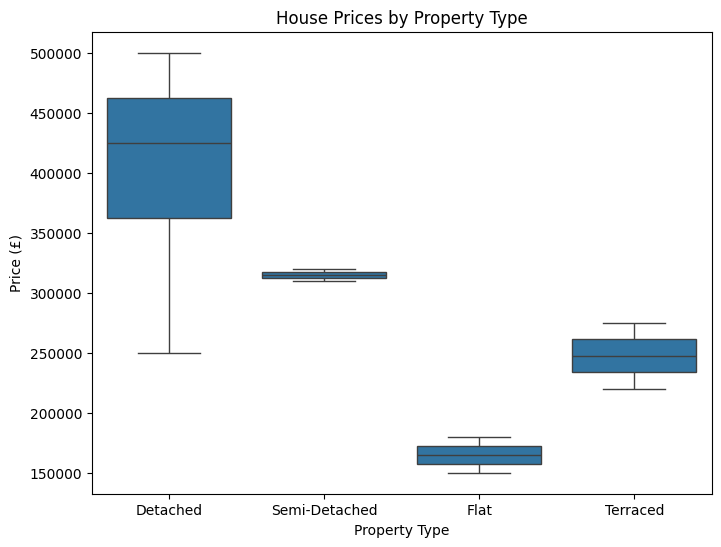

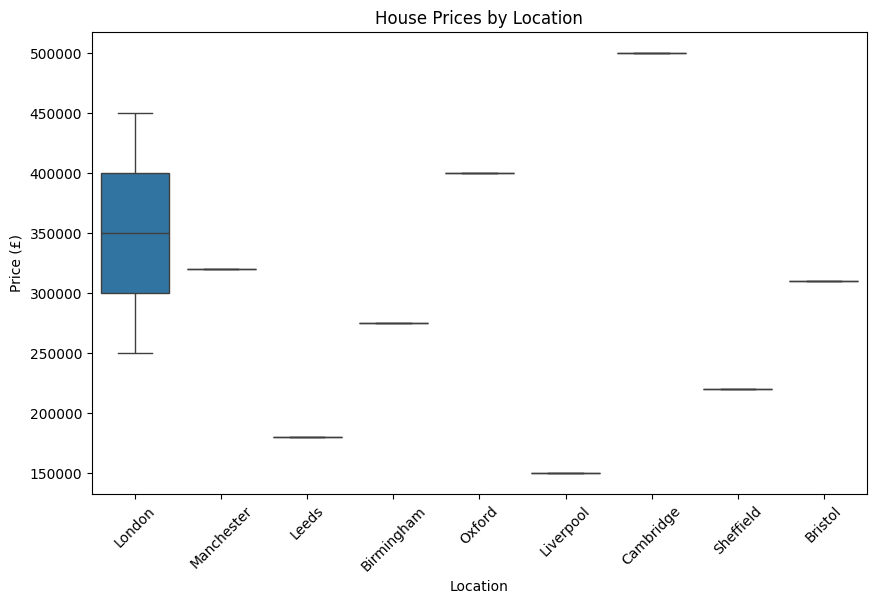

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV
df = pd.read_csv('/content/uk_housing_sample.csv')

# Show the first 5 rows
print(df.head())

# Dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Plot 1: Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Price by property type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property_Type', y='Price', data=df)
plt.title('House Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (£)')
plt.show()

# Plot 3: Price by location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('House Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data again (if in a new notebook)
df = pd.read_csv('/content/uk_housing_sample.csv')

# One-hot encode categorical variables (Property_Type and Location)
df_encoded = pd.get_dummies(df, columns=['Property_Type', 'Location'], drop_first=True)

# Features and target
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Compare actual vs predicted prices
comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(comparison.head())


Mean Absolute Error (MAE): 23415.04130953923
Root Mean Squared Error (RMSE): 25272.13046569754
R^2 Score: -24.547223131009513
   Actual Price  Predicted Price
8        310000    323906.286462
1        320000    352923.796157
